In [1]:
from QuditsOnQubits import create_ghz
from qiskit import qpy
from qiskit.circuit import QuantumCircuit

In [4]:
ghz = create_ghz()[0]

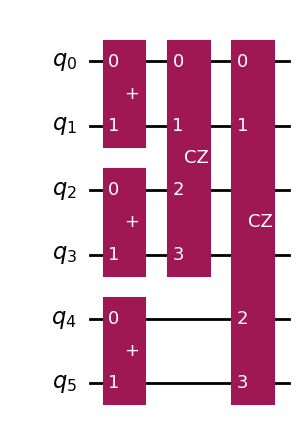

In [6]:
ghz.draw("mpl")

Wzor 63.

In [7]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

In [15]:
G1 = QuantumCircuit(6)
G1.append(Xgate, [0, 1])
G1.append(Zgate, [2, 3])
G1.append(Zgate, [4, 5])

In [16]:
G1G2 = QuantumCircuit(6)
G1G2.append(Xgate, [0, 1])
G1G2.append(Zgate, [2, 3])
G1G2.append(Zgate, [4, 5])
G1G2.append(Zgate, [0, 1])
G1G2.append(Xgate, [2, 3])

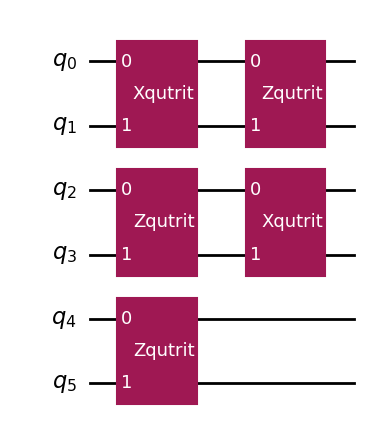

In [17]:
G1G2.draw('mpl')

In [18]:
G1G22 = QuantumCircuit(6)
G1G22.append(Xgate, [0, 1])
G1G22.append(Zgate, [2, 3])
G1G22.append(Zgate, [4, 5])
G1G22.append(Zgate, [0, 1])
G1G22.append(Xgate, [2, 3])
G1G22.append(Zgate, [0, 1])
G1G22.append(Xgate, [2, 3])

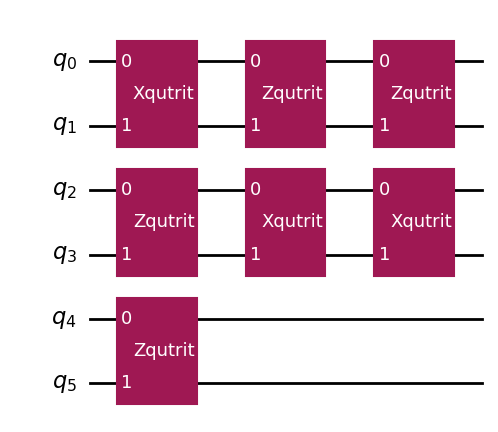

In [19]:
G1G22.draw('mpl')

In [20]:
G1G3 = QuantumCircuit(6)
G1G3.append(Xgate, [0, 1])
G1G3.append(Zgate, [2, 3])
G1G3.append(Zgate, [4, 5])
G1G2.append(Zgate, [0, 1])
G1G2.append(Xgate, [4, 5])

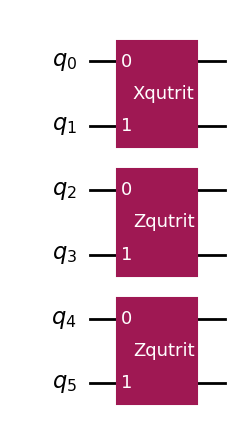

In [21]:
G1G3.draw("mpl")

In [22]:
operators = [G1, G1G2, G1G22, G1G3]

In [24]:
final_circs = []

for i in operators:
    tempcirc = ghz.copy()
    tempcirc.append(i, [0, 1, 2, 3, 4, 5])
    tempcirc.measure_all()
    final_circs.append(tempcirc)


In [25]:
import numpy as np

def exp_bell(counts, shots, k):
    oper = 0
    keys = list(counts.keys())[k]
    for i in list(counts.keys()):
        p = counts[i]/shots
        sum = 0
        for j in range(0, len(i), 2):
            if f'{keys[j]}{keys[j+1]}' == "00":
                sum += 0
            elif f'{keys[j]}{keys[j+1]}' == "01":
                sum += 1
            elif f'{keys[j]}{keys[j+1]}' == "10":
                sum += 2
        omega = np.exp(2*np.pi*1.j/3)
        f = pow(omega, sum)
        oper += p*f

    return oper

In [26]:
from qiskit.primitives import StatevectorSampler

bell_exp_list = []
exps_operators = []

shots = 10000
sampler = StatevectorSampler()

for i, j in zip(final_circs, range(len(final_circs))):
    job = sampler.run([i], shots = shots)
    data_pub = job.result()[0].data
    counts = data_pub.meas.get_counts()
    #exps_operators.append(str_list_gates[j])
    bell_exp = exp_bell(counts, shots, j)
    bell_exp_list.append(np.absolute(bell_exp))

In [27]:
bell_exp_list

[np.float64(1.0),
 np.float64(1.0),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999996)]

ck tutaj sa 1 bo nie mamy w ogole g(2,k)

In [29]:
2 * np.sum(bell_exp_list)

np.float64(7.999999999999999)